In [1]:
import random
import matplotlib.pyplot as plt

In [4]:
cities = ['A', 'B', 'C', 'E', 'M', 'S']

# Represent the Graph as a dictionary of dictionaries
A = {'A':0, 'B':10, 'C':15, 'E':14, 'M':11, 'S':10}
B = {'A':10, 'B':0, 'C':8, 'E':13 ,'M':15 ,'S':9}
C = {'A':15, 'B':8, 'C':0, 'E':11,'M':16,'S':10}
E = {'A':14, 'B':13, 'C':11, 'E':0,'M':9,'S':6}
M = {'A':11, 'B':15, 'C':16, 'E':9,'M':0,'S':9}
S = {'A':10, 'B':9, 'C':10, 'E':6,'M':9,'S':0}
Graph = {'A':A, 'B':B, 'C':C, 'E':E, 'M':M, 'S':S}

# We have to swap two cities to get a neighbour
# total 15 possible swaps for 6 cities
all_swaps = []
for i in range(len(cities)):
    for j in range(i+1, len(cities)):
        all_swaps.append((cities[i], cities[j]))

In [7]:
# Compute the total distance travelled to complete a cycle
# start from a city and visit every city and return to the same city
# Input: A path e.g. C-A-M-S-B-E as a list
def total_distance(path):
    distance = 0
    for i in range(1, len(path)):
        # add the distance between two adjacent cities
        distance += Graph.get(path[i-1]).get(path[i])
    
    # finally add the distance to the first city from the last city
    distance += Graph.get(path[i]).get(path[0])
    return distance

# swap neighbourhood structure
# Given a path two randomly chosen cities are swapped
# but if two cities to be swapped are specified then swap those
def swap_neighbour(path, swap=None):
    if swap is None:
        swap = random.sample(path, 2)
    # find the position of the two cities in the path
    pos_city1 = path.index(swap[0])
    pos_city2 = path.index(swap[1])
    
    # Now swap the two cities in the path
    new_path = list(path)
    new_path[pos_city1] = swap[1]
    new_path[pos_city2] = swap[0]
    
    return new_path

In [28]:
# We need to keep all neighbours of a path as candidates
# compute their fit and find the best fitting neighbour
class Neighbour:
    def __init__(self, path, swap):
        self.swap = swap
        self.path = swap_neighbour(path, swap)
        self.fpath = total_distance(self.path)
        


In [44]:
# Initialization 
MaxIter = 20
# TABU list has dis-allowed swaps; initially nothing is disallowed
TABU_list = [('A','A'), ('B', 'B')] # A list of two elements; initial values not relevant

# Initial solution construction phase
# Generate an initial solution at random
# Note that the solution is represented as a sequence of cities (a path not a cycle)
sol = random.sample(cities, 6)
fsol = total_distance(sol)
solbest = sol
fsolbest = fsol

# keep a list of fsol and fsolbest for plotting
y_fsol = [fsol]
y_fsolbest = [fsolbest]
print("Iteration: 0, Best solution: " + '-'.join(solbest) + ", Best Fit: " + str(fsolbest))



Iteration: 0, Best solution: E-A-C-S-M-B, Best Fit: 76


In [45]:
# Improvement phase
for iteration in range(MaxIter):
    # find all neighbours of sol
    all_neighbours = []
    for swap in all_swaps:
        all_neighbours.append(Neighbour(sol, swap))

    # sort the neighbours in order of fit/total distance
    sorted_neighbours = sorted(all_neighbours, key=lambda obj: obj.fpath)
    
    # if the top element is in tabu list don't take it
    # but we need to check for Aspiration; that means if the tabu neighbour gives better solution than the
    # fsolbest then we should take it
    for neigh in sorted_neighbours:
        # check if it is in tabu list
        if neigh.swap in TABU_list:
            # check for Aspiration
            if neigh.fpath < fsolbest:
                sol = neigh.path
                fsol = neigh.fpath
                solbest = neigh.path
                fsolbest = neigh.fpath
                # modify tabu list
                TABU_list[-1] = TABU_list[0]
                TABU_list[0] = neigh.swap
                break
            # else go to the next element in the candidate list of neighbours
        else:
            if neigh.fpath < fsolbest:
                # update the best fit
                solbest = neigh.path
                fsolbest = neigh.fpath
            
            # we should treat the top neighbour as the sol
            sol = neigh.path
            fsol = neigh.fpath
                
            # modify tabu list
            TABU_list[-1] = TABU_list[0]
            TABU_list[0] = neigh.swap
            break
    
    # Add to the list for plotting
    y_fsol.append(fsol)
    y_fsolbest.append(fsolbest)
    
    print("Iteration: " + str(iteration+1) + " Best solution: " + '-'.join(solbest) + " Best Fit: "+str(fsolbest))    


Iteration: 1 Best solution: E-B-C-S-M-A Best Fit: 65
Iteration: 2 Best solution: S-B-C-E-M-A Best Fit: 58
Iteration: 3 Best solution: A-B-C-E-M-S Best Fit: 57
Iteration: 4 Best solution: A-B-C-E-S-M Best Fit: 55
Iteration: 5 Best solution: A-B-C-S-E-M Best Fit: 54
Iteration: 6 Best solution: A-B-C-S-E-M Best Fit: 54
Iteration: 7 Best solution: A-B-C-S-E-M Best Fit: 54
Iteration: 8 Best solution: A-B-C-S-E-M Best Fit: 54
Iteration: 9 Best solution: A-B-C-S-E-M Best Fit: 54
Iteration: 10 Best solution: A-B-C-S-E-M Best Fit: 54
Iteration: 11 Best solution: A-B-C-S-E-M Best Fit: 54
Iteration: 12 Best solution: A-B-C-S-E-M Best Fit: 54
Iteration: 13 Best solution: A-B-C-S-E-M Best Fit: 54
Iteration: 14 Best solution: A-B-C-S-E-M Best Fit: 54
Iteration: 15 Best solution: A-B-C-S-E-M Best Fit: 54
Iteration: 16 Best solution: A-B-C-S-E-M Best Fit: 54
Iteration: 17 Best solution: A-B-C-S-E-M Best Fit: 54
Iteration: 18 Best solution: A-B-C-S-E-M Best Fit: 54
Iteration: 19 Best solution: A-B-C-S-

In [46]:
print("Best solution: " + '-'.join(solbest))
print("Shortest Distance: " + str(fsolbest))

Best solution: A-B-C-S-E-M
Shortest Distance: 54


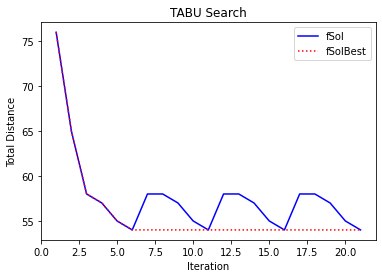

In [47]:
# Plotting in matplotlib
x = range(1, MaxIter+2)
plt.plot(x, y_fsol, 'b', label='fSol')
plt.plot(x, y_fsolbest, ':r', label='fSolBest')
plt.xlabel('Iteration')
plt.ylabel('Total Distance')
plt.title('TABU Search')
plt.legend()
plt.show()